**Slides:** [slides.pdf](./slides.pdf)

# OCR: Recognizing text

Sometimes you can't actually get the text off of the page. It's an *image* of text instead of being actual text.

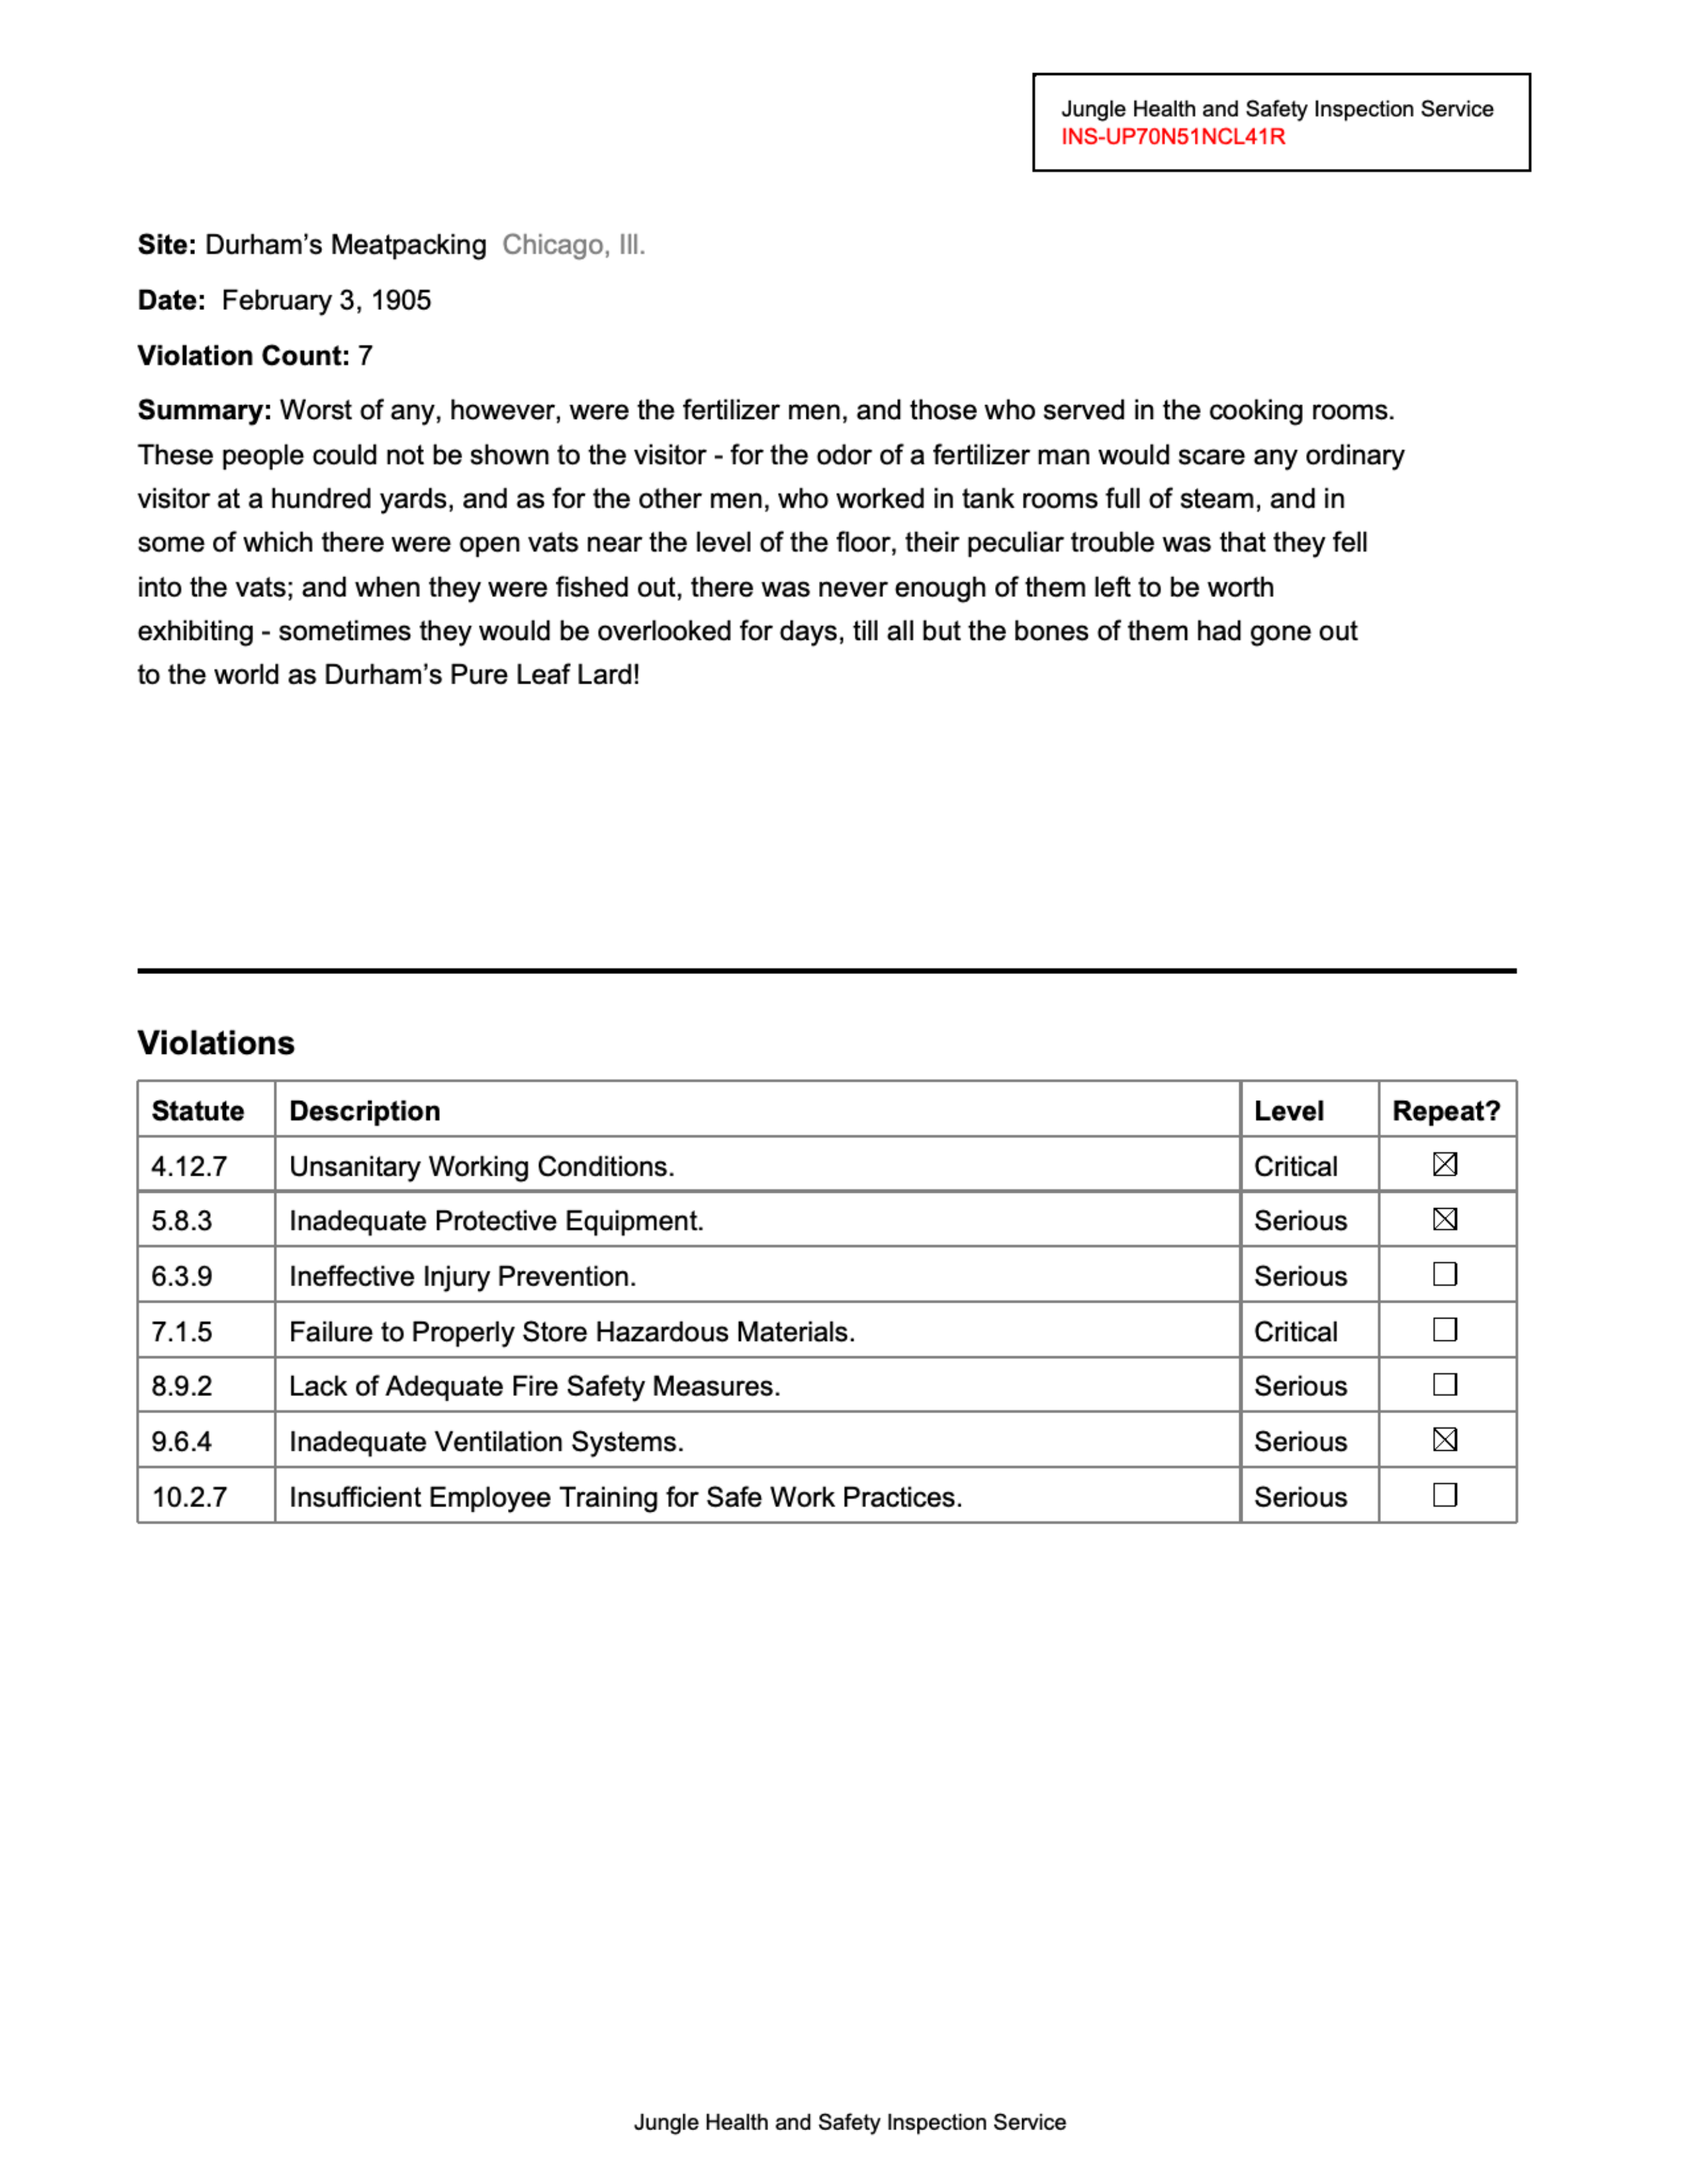

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")
page = pdf.pages[0]
page.show()

Looks the same as the last one, right? But when we try to extract the text...

In [3]:
text = page.extract_text()
print(text)

Nothing! **It's time for OCR.**

There are a looooot of OCR engines out there, and one of the things that makes Natural PDF nice is that it supports multiples. Figuring out which one is the "best" isn't as tough when you can just run them all right after each other.

The default is [EasyOCR](https://github.com/JaidedAI/EasyOCR) which usually works fine. But what happens when we try it with this document?

In [4]:
page.apply_ocr()

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Using CPU. Note: This module is much faster with a GPU.
/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


<Page number=1 index=0>

In [5]:
text = page.extract_text()
print(text)

Jungle Health and Safety Inspection Service
INS-UPZONS1NCLAIR
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms
These people could not be shown to the visitor for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men; who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor; their peculiar trouble was thattheyfell
into the vats; and whentheywere fished out; there was never enough of them left to be worth
exhibiting sometimestheywould be overlooked for days, till all but the bones of them had gone out
to the world as Durham's Pure Leaf Lardl
Violations
Statute Description Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical
Inadequate Protective Equipment: Serious
6.3.9 Ineffective Injury Prevention: Serious
7.1.5 Failure to Properly Store Hazardous Materials. Critical
8.9.2 Lack of Ad

It does pretty well! The only issue is it gives me **Durham's Pure Leaf Lardl** instead of **Durham's Pure Leaf Lard!** I don't need to know why, though, really, because I can just try some other engine! You can also fool around with the options - some of the the lowest-hanging fruit is increasing the resolution of the OCR. The default at the moment is 150, you can try upping to 300 for (potentially) better results.

To fix this I'll both up the resolution and try another OCR engine, [surya](https://github.com/datalab-to/surya).

In [6]:
page.apply_ocr('surya', resolution=192)

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Recognizing Text: 100%|█████████████████████████| 46/46 [00:23<00:00,  1.93it/s]


<Page number=1 index=0>

In [7]:
text = page.extract_text()
print(text)

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham's Meatpacking Chicago, Ill.
Date: February 3, 1905
<b>Violation Count: 7</b>
<b>Summary:</b> Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham's Pure Leaf Lard!
<b>Violations</b>
<b>Statute</b> <b>Description</b> Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical <math>\boxtimes</math>
5.8.3 Inadequate Protective Equipment. Serious <math>\boxtimes</math>
6.3.9 Ineffective Injury Prevention. Serious <math display="inline">\Box</math

## Correcting OCR

While we love OCR when it works, it often does *not* work great. We have a few solutions: send humans after it, or use LLMs or spell check to correct it.

In [15]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")

page = pdf.pages[0]
# We'll OCR this with the worst possible resolution
page.apply_ocr('surya', resolution=15)

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Recognizing Text: 100%|█████████████████████████| 46/46 [00:26<00:00,  1.74it/s]


<Page number=1 index=0>

After we apply OCR we can export to a magic format that we can display and fix up separately!

In [16]:
text = page.extract_text()
print(text)

Angle Health and Safety Inspection Service
Date: Calinary 3, 1995
<b>Victorian Passet 3</b>
Summary, Wast of any, havever, were the fertilizer men, and these who served in the coulding rooms.
These people could not be above to the visitor - for the oder of a fedilizer man would econy any ordinary
visitor at a hundred years, and as for the other men, who worked in tank rooms full of steam, and in
some photost there were open rath near the level of the floor, their presilier trouble was that they fell.
into the vate; and when they ware fished out, there was never anough of them left to be worth
In the world as Darbory's Pure Leaf Land
<b>Statute</b> Description Regeart
6527 Uraanitary Markins Conditions. 33
683 Inationals Detection Engineers 51
638 Institution Injury Presention <b>Serious</b>
Fallure to Property Store Hazardous Materials. Colorad <math>\mathbf{r}</math>
0.92 Leck of Adequate Fine Solidy Moseums.
0.6.6 Inadequate Ventilation Systems <b>Renner</b> 53
15.97 Insufficient Emp

### With LLMs

Let's see what our text looks like.

In [17]:
page.find_all('text').inspect()

## Collection Inspection (34 elements)

### Word Elements

| text | x0 | top | x1 | bottom | font_family | font_variant | size | styles | source | confidence | color |
|------|------|------|------|------|------|------|------|------|------|------|------|
| Angle Health and Safety Inspection Service | 805 | 67 | 1136 | 91 | OCR |  | 24 |  | ocr | 0.83 | #000000 |
| Date: Calinary 3, 1995 | 101 | 211 | 331 | 235 | OCR |  | 24 |  | ocr | 0.77 | #000000 |
| <b>Victorian Passet 3</b> | 101 | 254 | 288 | 274 | OCR |  | 19 |  | ocr | 0.51 | #000000 |
| Summary, Wast of any, havever, were the fertilizer... | 101 | 298 | 1064 | 322 | OCR |  | 24 |  | ocr | 0.87 | #000000 |
| These people could not be above to the visitor - f... | 101 | 326 | 1074 | 355 | OCR |  | 29 |  | ocr | 0.92 | #000000 |
| visitor at a hundred years, and as for the other m... | 101 | 360 | 1026 | 389 | OCR |  | 29 |  | ocr | 0.88 | #000000 |
| some photost there were open rath near the level o... | 101 | 394 | 1045 | 422 | OCR |  | 29 |  | ocr | 0.95 | #000000 |
| into the vate; and when they ware fished out, ther... | 101 | 427 | 973 | 456 | OCR |  | 29 |  | ocr | 0.89 | #000000 |
| In the world as Darbory's Pure Leaf Land | 101 | 494 | 489 | 518 | OCR |  | 24 |  | ocr | 0.59 | #000000 |
| <b>Statute</b> | 110 | 821 | 192 | 845 | OCR |  | 24 |  | ocr | 0.59 | #000000 |
| Description | 216 | 826 | 340 | 849 | OCR |  | 24 |  | ocr | 0.71 | #000000 |
| Regeart | 1050 | 826 | 1141 | 849 | OCR |  | 24 |  | ocr | 0.62 | #000000 |
| 6527 | 110 | 869 | 177 | 893 | OCR |  | 24 |  | ocr | 0.56 | #000000 |
| Uraanitary Markins Conditions. | 216 | 869 | 513 | 893 | OCR |  | 24 |  | ocr | 0.79 | #000000 |
| 33 | 1078 | 869 | 1112 | 893 | OCR |  | 24 |  | ocr | 0.52 | #000000 |
| 683 | 110 | 907 | 168 | 931 | OCR |  | 24 |  | ocr | 0.55 | #000000 |
| Inationals Detection Engineers | 216 | 907 | 532 | 931 | OCR |  | 24 |  | ocr | 0.63 | #000000 |
| 51 | 1078 | 907 | 1112 | 931 | OCR |  | 24 |  | ocr | 0.66 | #000000 |
| 638 | 110 | 950 | 168 | 974 | OCR |  | 24 |  | ocr | 0.96 | #000000 |
| Institution Injury Presention | 216 | 950 | 484 | 974 | OCR |  | 24 |  | ocr | 0.58 | #000000 |
| <b>Serious</b> | 949 | 950 | 1026 | 974 | OCR |  | 24 |  | ocr | 0.88 | #000000 |
| <math>\mathbf{r}</math> | 1078 | 989 | 1112 | 1013 | OCR |  | 24 |  | ocr | 0.72 | #000000 |
| Fallure to Property Store Hazardous Materials. | 216 | 993 | 652 | 1017 | OCR |  | 24 |  | ocr | 0.90 | #000000 |
| Colorad | 944 | 993 | 1021 | 1013 | OCR |  | 19 |  | ocr | 0.50 | #000000 |
| 0.92 | 110 | 1032 | 168 | 1056 | OCR |  | 24 |  | ocr | 0.84 | #000000 |
| Leck of Adequate Fine Solidy Moseums. | 216 | 1037 | 594 | 1061 | OCR |  | 24 |  | ocr | 0.92 | #000000 |
| 0.6.6 | 110 | 1075 | 168 | 1099 | OCR |  | 24 |  | ocr | 0.93 | #000000 |
| Inadequate Ventilation Systems | 216 | 1075 | 518 | 1099 | OCR |  | 24 |  | ocr | 0.73 | #000000 |
| <b>Renner</b> | 944 | 1075 | 1026 | 1099 | OCR |  | 24 |  | ocr | 0.55 | #000000 |
| 53 | 1078 | 1075 | 1112 | 1099 | OCR |  | 24 |  | ocr | 0.70 | #000000 |
_Showing 30 of 34 elements (pass limit= to see more)_

Some of these are pretty easy - for example, "Uraanitary Warking Conditions" should be "Unsanity working conditions." OCR tools just don't know that kind of thing! But what if we could go through each piece of text, some some sort of spell check or something?

You can use `correct_ocr` to change the text in a region.

In [18]:
def correct_text_region(region):
    return "This is the updated text"
    
page.correct_ocr(correct_text_region) 

Updating text Page 1:   0%|          | 0/34 [00:00<?, ?element/s]

<Page number=1 index=0>

And then, magically, all of our text is whatever we `return`.

In [19]:
page.find_all('text').inspect()

## Collection Inspection (34 elements)

### Word Elements

| text | x0 | top | x1 | bottom | font_family | font_variant | size | styles | source | confidence | color |
|------|------|------|------|------|------|------|------|------|------|------|------|
| This is the updated text | 805 | 67 | 1136 | 91 | OCR |  | 24 |  | ocr | 0.83 | #000000 |
| This is the updated text | 101 | 211 | 331 | 235 | OCR |  | 24 |  | ocr | 0.77 | #000000 |
| This is the updated text | 101 | 254 | 288 | 274 | OCR |  | 19 |  | ocr | 0.51 | #000000 |
| This is the updated text | 101 | 298 | 1064 | 322 | OCR |  | 24 |  | ocr | 0.87 | #000000 |
| This is the updated text | 101 | 326 | 1074 | 355 | OCR |  | 29 |  | ocr | 0.92 | #000000 |
| This is the updated text | 101 | 360 | 1026 | 389 | OCR |  | 29 |  | ocr | 0.88 | #000000 |
| This is the updated text | 101 | 394 | 1045 | 422 | OCR |  | 29 |  | ocr | 0.95 | #000000 |
| This is the updated text | 101 | 427 | 973 | 456 | OCR |  | 29 |  | ocr | 0.89 | #000000 |
| This is the updated text | 101 | 494 | 489 | 518 | OCR |  | 24 |  | ocr | 0.59 | #000000 |
| This is the updated text | 110 | 821 | 192 | 845 | OCR |  | 24 |  | ocr | 0.59 | #000000 |
| This is the updated text | 216 | 826 | 340 | 849 | OCR |  | 24 |  | ocr | 0.71 | #000000 |
| This is the updated text | 1050 | 826 | 1141 | 849 | OCR |  | 24 |  | ocr | 0.62 | #000000 |
| This is the updated text | 110 | 869 | 177 | 893 | OCR |  | 24 |  | ocr | 0.56 | #000000 |
| This is the updated text | 216 | 869 | 513 | 893 | OCR |  | 24 |  | ocr | 0.79 | #000000 |
| This is the updated text | 1078 | 869 | 1112 | 893 | OCR |  | 24 |  | ocr | 0.52 | #000000 |
| This is the updated text | 110 | 907 | 168 | 931 | OCR |  | 24 |  | ocr | 0.55 | #000000 |
| This is the updated text | 216 | 907 | 532 | 931 | OCR |  | 24 |  | ocr | 0.63 | #000000 |
| This is the updated text | 1078 | 907 | 1112 | 931 | OCR |  | 24 |  | ocr | 0.66 | #000000 |
| This is the updated text | 110 | 950 | 168 | 974 | OCR |  | 24 |  | ocr | 0.96 | #000000 |
| This is the updated text | 216 | 950 | 484 | 974 | OCR |  | 24 |  | ocr | 0.58 | #000000 |
| This is the updated text | 949 | 950 | 1026 | 974 | OCR |  | 24 |  | ocr | 0.88 | #000000 |
| This is the updated text | 1078 | 989 | 1112 | 1013 | OCR |  | 24 |  | ocr | 0.72 | #000000 |
| This is the updated text | 216 | 993 | 652 | 1017 | OCR |  | 24 |  | ocr | 0.90 | #000000 |
| This is the updated text | 944 | 993 | 1021 | 1013 | OCR |  | 19 |  | ocr | 0.50 | #000000 |
| This is the updated text | 110 | 1032 | 168 | 1056 | OCR |  | 24 |  | ocr | 0.84 | #000000 |
| This is the updated text | 216 | 1037 | 594 | 1061 | OCR |  | 24 |  | ocr | 0.92 | #000000 |
| This is the updated text | 110 | 1075 | 168 | 1099 | OCR |  | 24 |  | ocr | 0.93 | #000000 |
| This is the updated text | 216 | 1075 | 518 | 1099 | OCR |  | 24 |  | ocr | 0.73 | #000000 |
| This is the updated text | 944 | 1075 | 1026 | 1099 | OCR |  | 24 |  | ocr | 0.55 | #000000 |
| This is the updated text | 1078 | 1075 | 1112 | 1099 | OCR |  | 24 |  | ocr | 0.70 | #000000 |
_Showing 30 of 34 elements (pass limit= to see more)_

But clearly we don't want the same thing every time! Let's add the bad OCR back in...

In [30]:
# Re-apply the OCR to break it again
page.apply_ocr('surya', resolution=20)

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Recognizing Text: 100%|█████████████████████████| 46/46 [00:14<00:00,  3.10it/s]


<Page number=1 index=0>

...and feed each line to an LLM trying to fix it.

In [31]:
from openai import OpenAI
from natural_pdf.ocr.utils import direct_ocr_llm

client = OpenAI(api_key='sk-proj--......')

prompt = """
Correct the spelling of this OCR'd text, a snippet of a document.
Preserve original capitalization, punctuation, and symbols. 
Changing meaning is okay if it's clearly an OCR issue.
Do not add any explanatory text, translations, comments, or quotation marks around the result.
"""

def correct_text_region(region):
    text = region.extract_text()
    completion = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[
            {
                "role": "system", "content": prompt
            },
            {
                "role": "user",
                "content": text
            },
        ],
    )

    updated = completion.choices[0].message.content

    if text != updated:    
        print(f"OLD: {text}\nNEW:{updated}") 

    return updated

page.correct_ocr(correct_text_region) 

Updating text Page 1:   0%|          | 0/40 [00:00<?, ?element/s]

OLD: Jungle Health and Safety Impection Service
NEW:Jungle Health and Safety Inspection Service
OLD: <b>INFLUENTING TNCLASS</b>
NEW:<bold>INFLUENCING TNCLASS</bold>
OLD: Site: Durham's Mealpacking Chicago, II.
NEW:Site: Durham's Mealpacking Chicago, IL.
OLD: visitor at a hundred vards, and as for the other men, who worked in tank rooms full of steam, and in
NEW:visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
OLD: into the vats; and when they were fished out, there was never enough of them left to be worth
NEW:into the vats; and when they were filched out, there was never enough of them left to be worth
OLD: In the world on Durham's Pure Leaf Land.
NEW:In the world of Durham's Pure Leaf Land.
OLD: Unseritory Working Conditions.
NEW:Uncertain Working Conditions.
OLD: Jungle Health and Statety Inspection Service
NEW:Jungle Health and Safety Inspection Service


<Page number=1 index=0>

And now we can use `.extract_text()` the magicaly same way.

The real benefit of this vs sending the whole document to the LLM is *we don't change where the text is*. An LLM might OCR something for us, but it *loses the spatial context that we find so important*.

In [29]:
text = page.extract_text()
print(text)

Agency Health and Safety Inspection Service
Date: January 3, 1995
Victorian Passet 3
Summary, waste of any, however, were the fertilizer men, and these who served in the cooking rooms.
These people could not be above to the visitor - for the order of a fertiliser man would effony any ordinary
visitor at a hundred years, and as for the other men, who worked in tank rooms full of steam, and in
some photos there were open rath near the level of the floor, their presilier trouble was that they fell.
into the lake; and when they were fished out, there was never enough of them left to be worth
In the world of Darbory's Pure Leaf Land
<b>Statute</b> Description Regret
6527 Uranitary Marking Conditions. 33
683 International Detection Engineers 51
638 Institution Injury Presentation Serious
Failure to Property Store Hazardous Materials. Colorado <math>\mathbf{r}</math>
0.92 Lack of Adequate Fine Solidgy Museums.
0.6.6 Inadequate Ventilation Systems < b > Renner < /b > 53
15.97 Insufficient Empl

## Let's do the OCR with the LLM, period

But if the LLM is *that good* at OCR, we can also find pieces of the page we would like to OCR and *send them each in isolation to the LLM*. We use `detect_only=True` so it doesn't try to figure out what the text is, just that the text is there.

In [ ]:
page.apply_ocr('surya', detect_only=True)
page.find_all('text').show()

In [ ]:
page.find_all('text').inspect()

Now we'll do an even fancier `correct_text_region`: it takes the region as an image, and sends it right on over to the LLM for OCR.

In [ ]:
from openai import OpenAI
from natural_pdf.ocr.utils import direct_ocr_llm

client = OpenAI(api_key='API_KEY_GOES_HERE')

prompt = """OCR this image patch. Return only the exact text content visible in the image. 
Preserve original spelling, capitalization, punctuation, and symbols.
Fix misspellings if they are the result of blurry or incorrect OCR.
Do not add any explanatory text, translations, comments, or quotation marks around the result.
If you cannot process the image or do not see any text, return an empty space.
The text is from an inspection report of a slaughterhouse."""
# The text is likely from a Greek document, potentially a spreadsheet, containing Modern Greek words or numbers

def correct_text_region(region):
    # Use a high resolution for the LLM call for best accuracy
    return direct_ocr_llm(
        region, 
        client, 
        prompt=prompt, 
        resolution=150, 
        model="gpt-4o" 
    )

page.correct_ocr(correct_text_region) 

What do we have now?

In [ ]:
page.find_all('text').inspect()

In [ ]:
text = page.extract_text()
print(text)

## Finding tables on OCR documents

When we used `page.extract_table()` last time, it was easy because there were all of these `line` elements on the page that pdfplumber could detect and say "hey, it's a table!" For the same reason that there's no *real* text on the page, there's also no *real* lines on the page. Instead, we're going to do a fun secret trick where we look at what horizontal and vertical coordinates *seem* like they might be lines by setting a threshold.

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Using CPU. Note: This module is much faster with a GPU.
/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


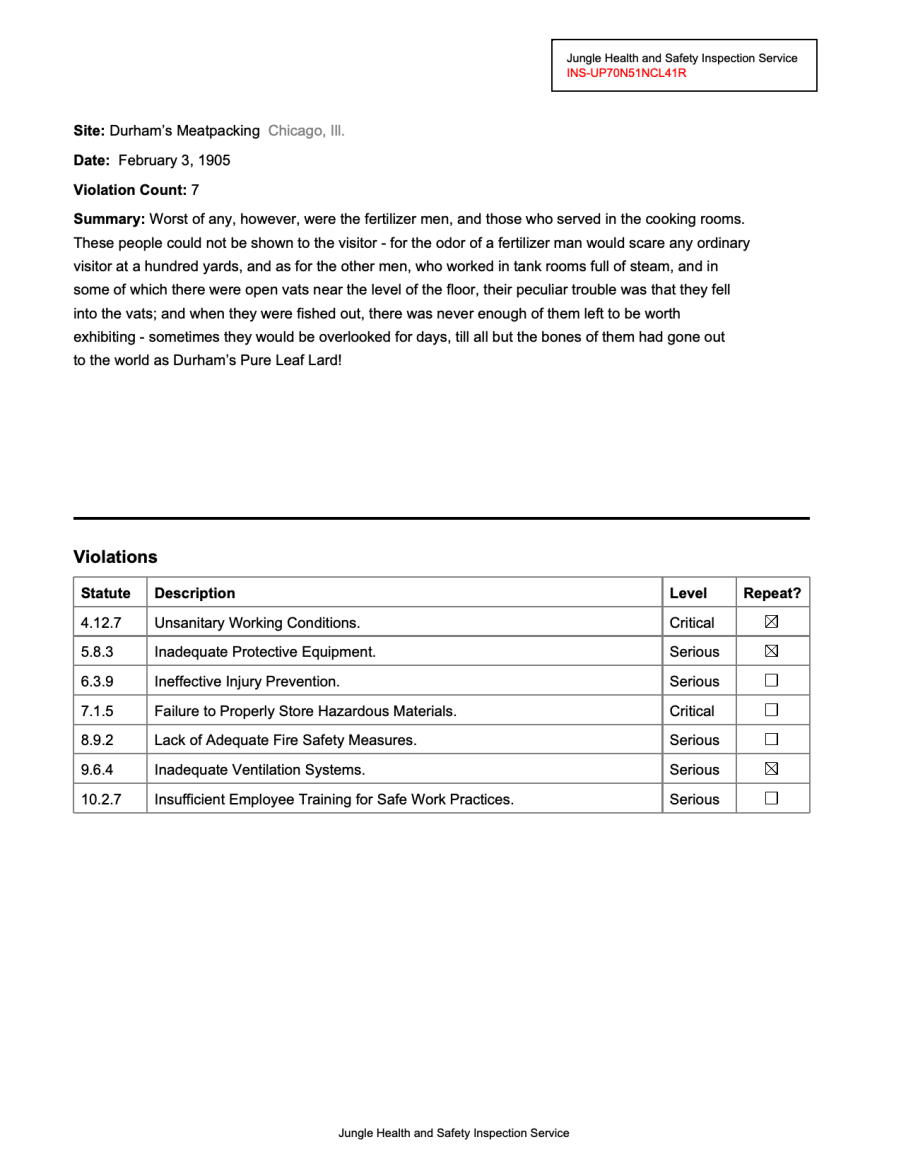

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")
page.apply_ocr()
page.show(width=900)

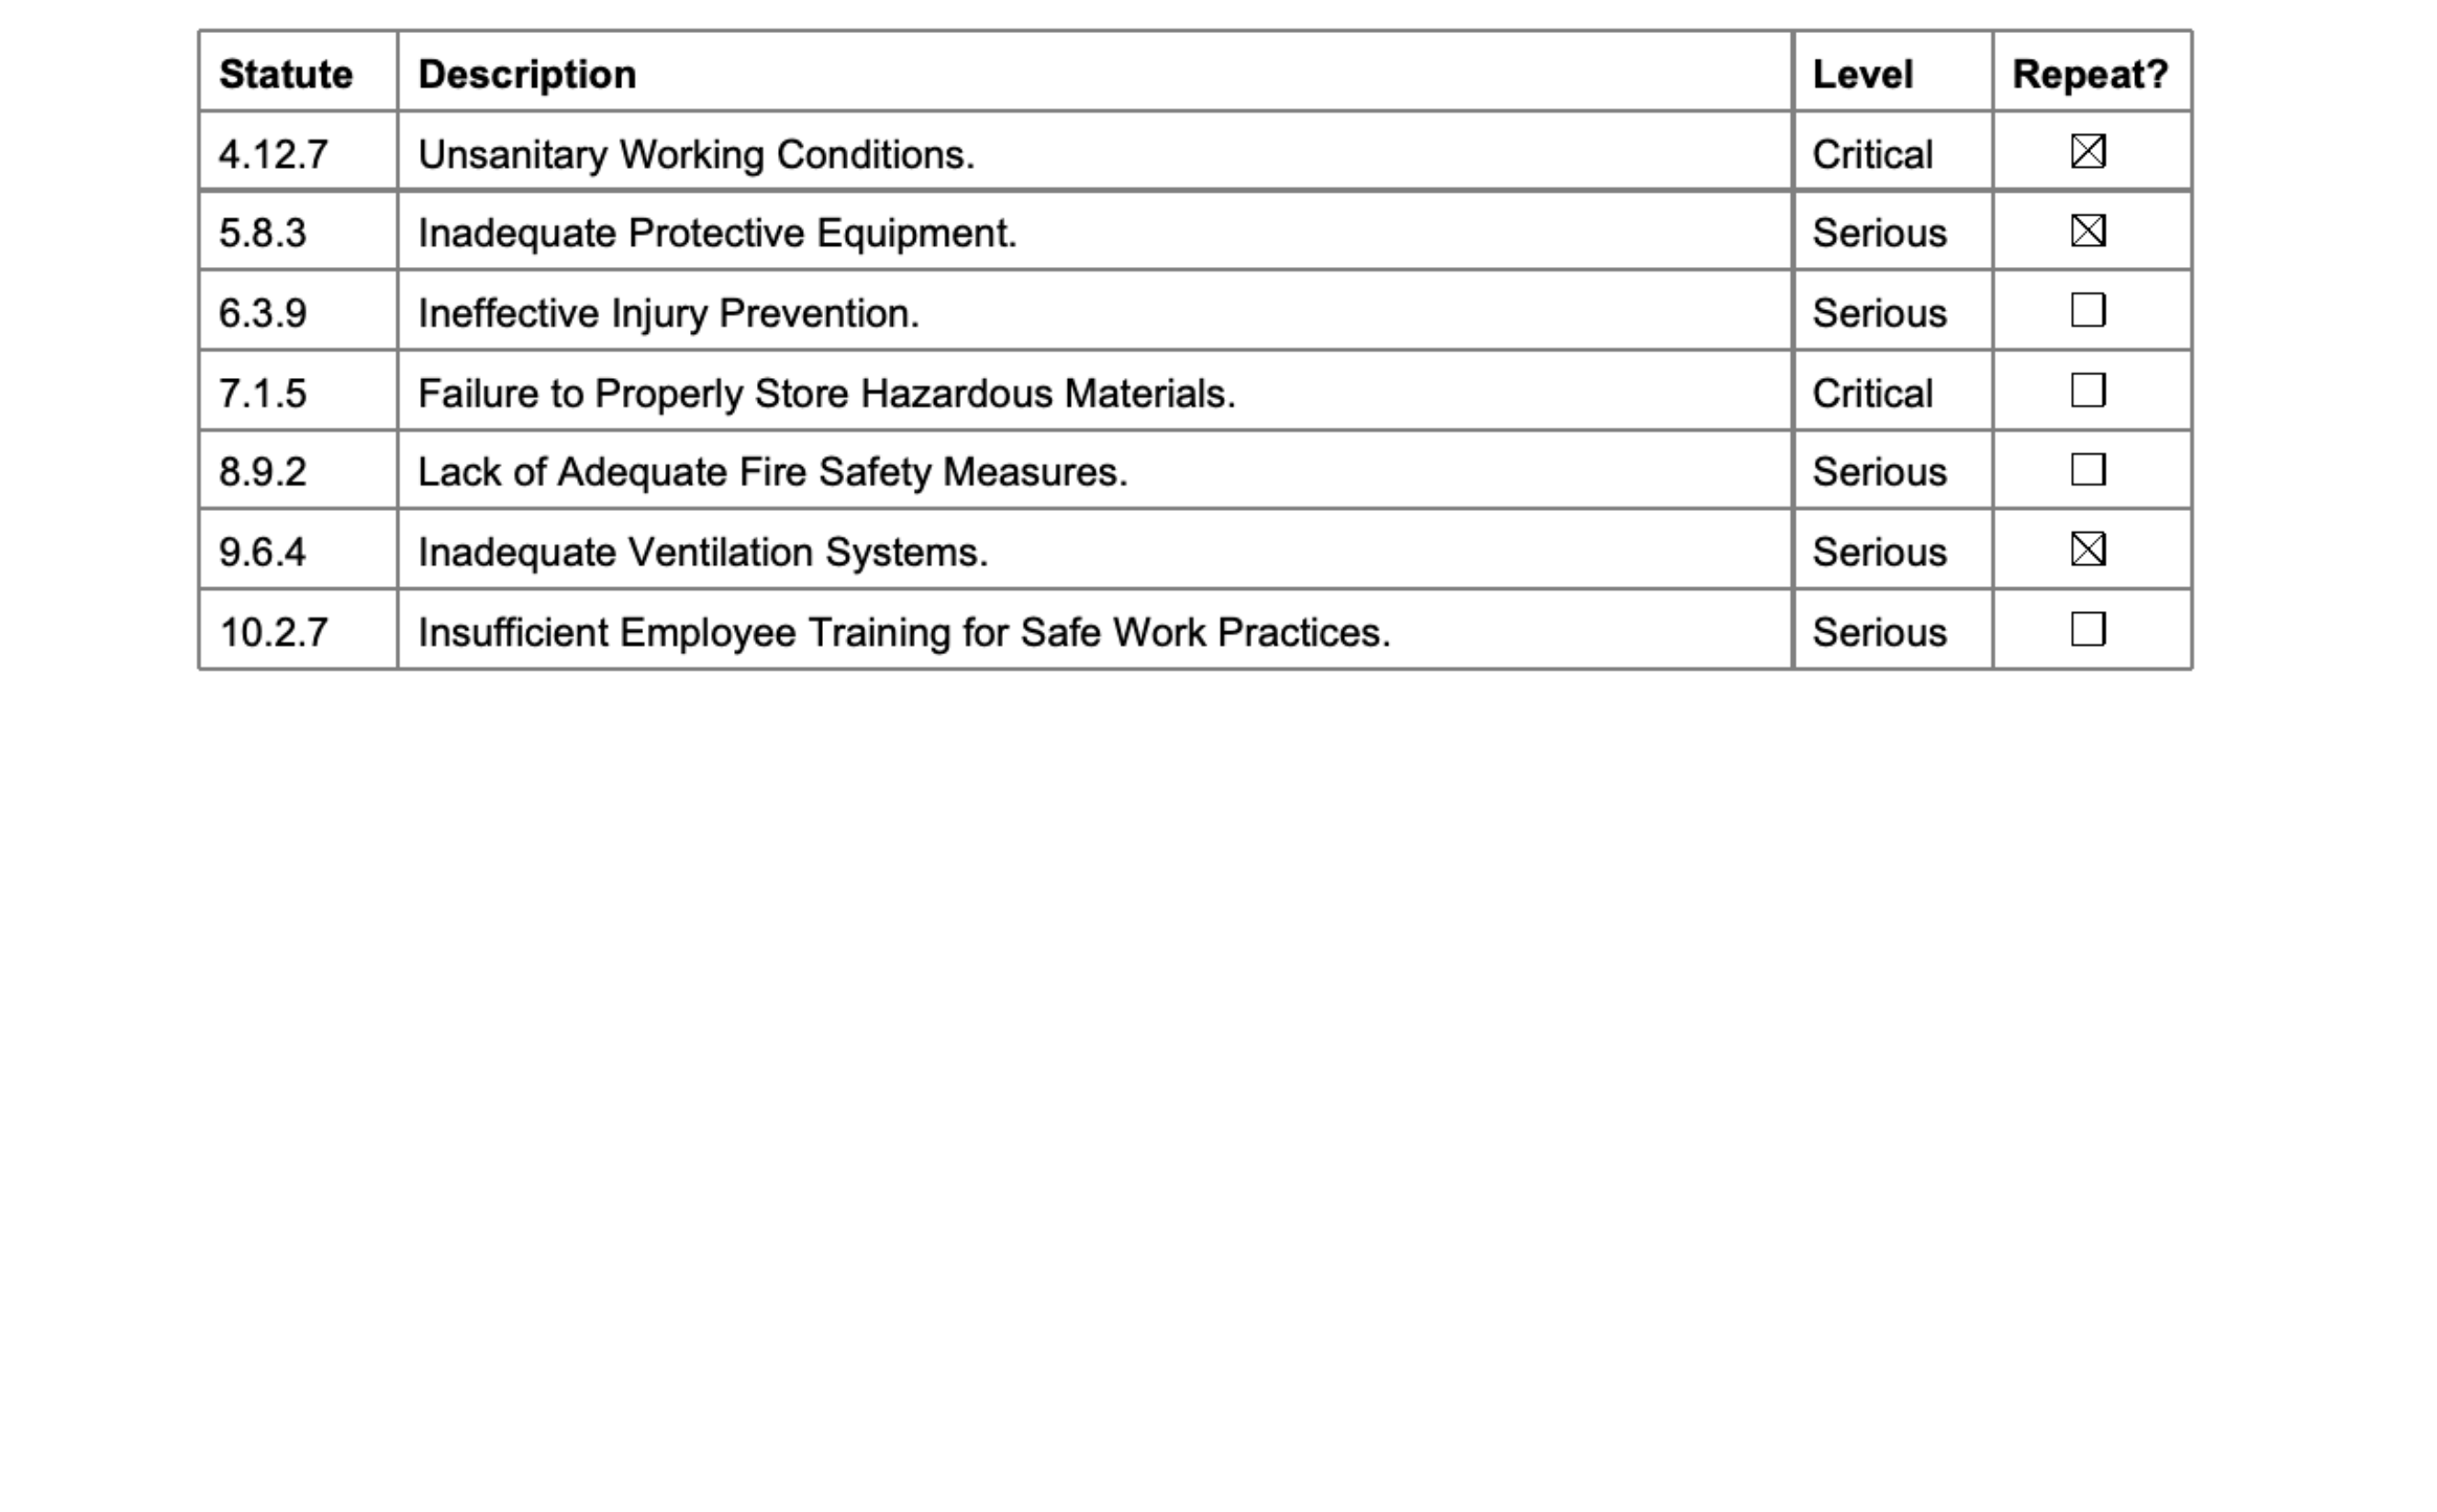

In [4]:
table_area = (
    page
    .find('text:contains(Violations)')
    .below(
        until='text:contains(Jungle)',
        include_endpoint=False
    )
)
table_area.show(crop=True)

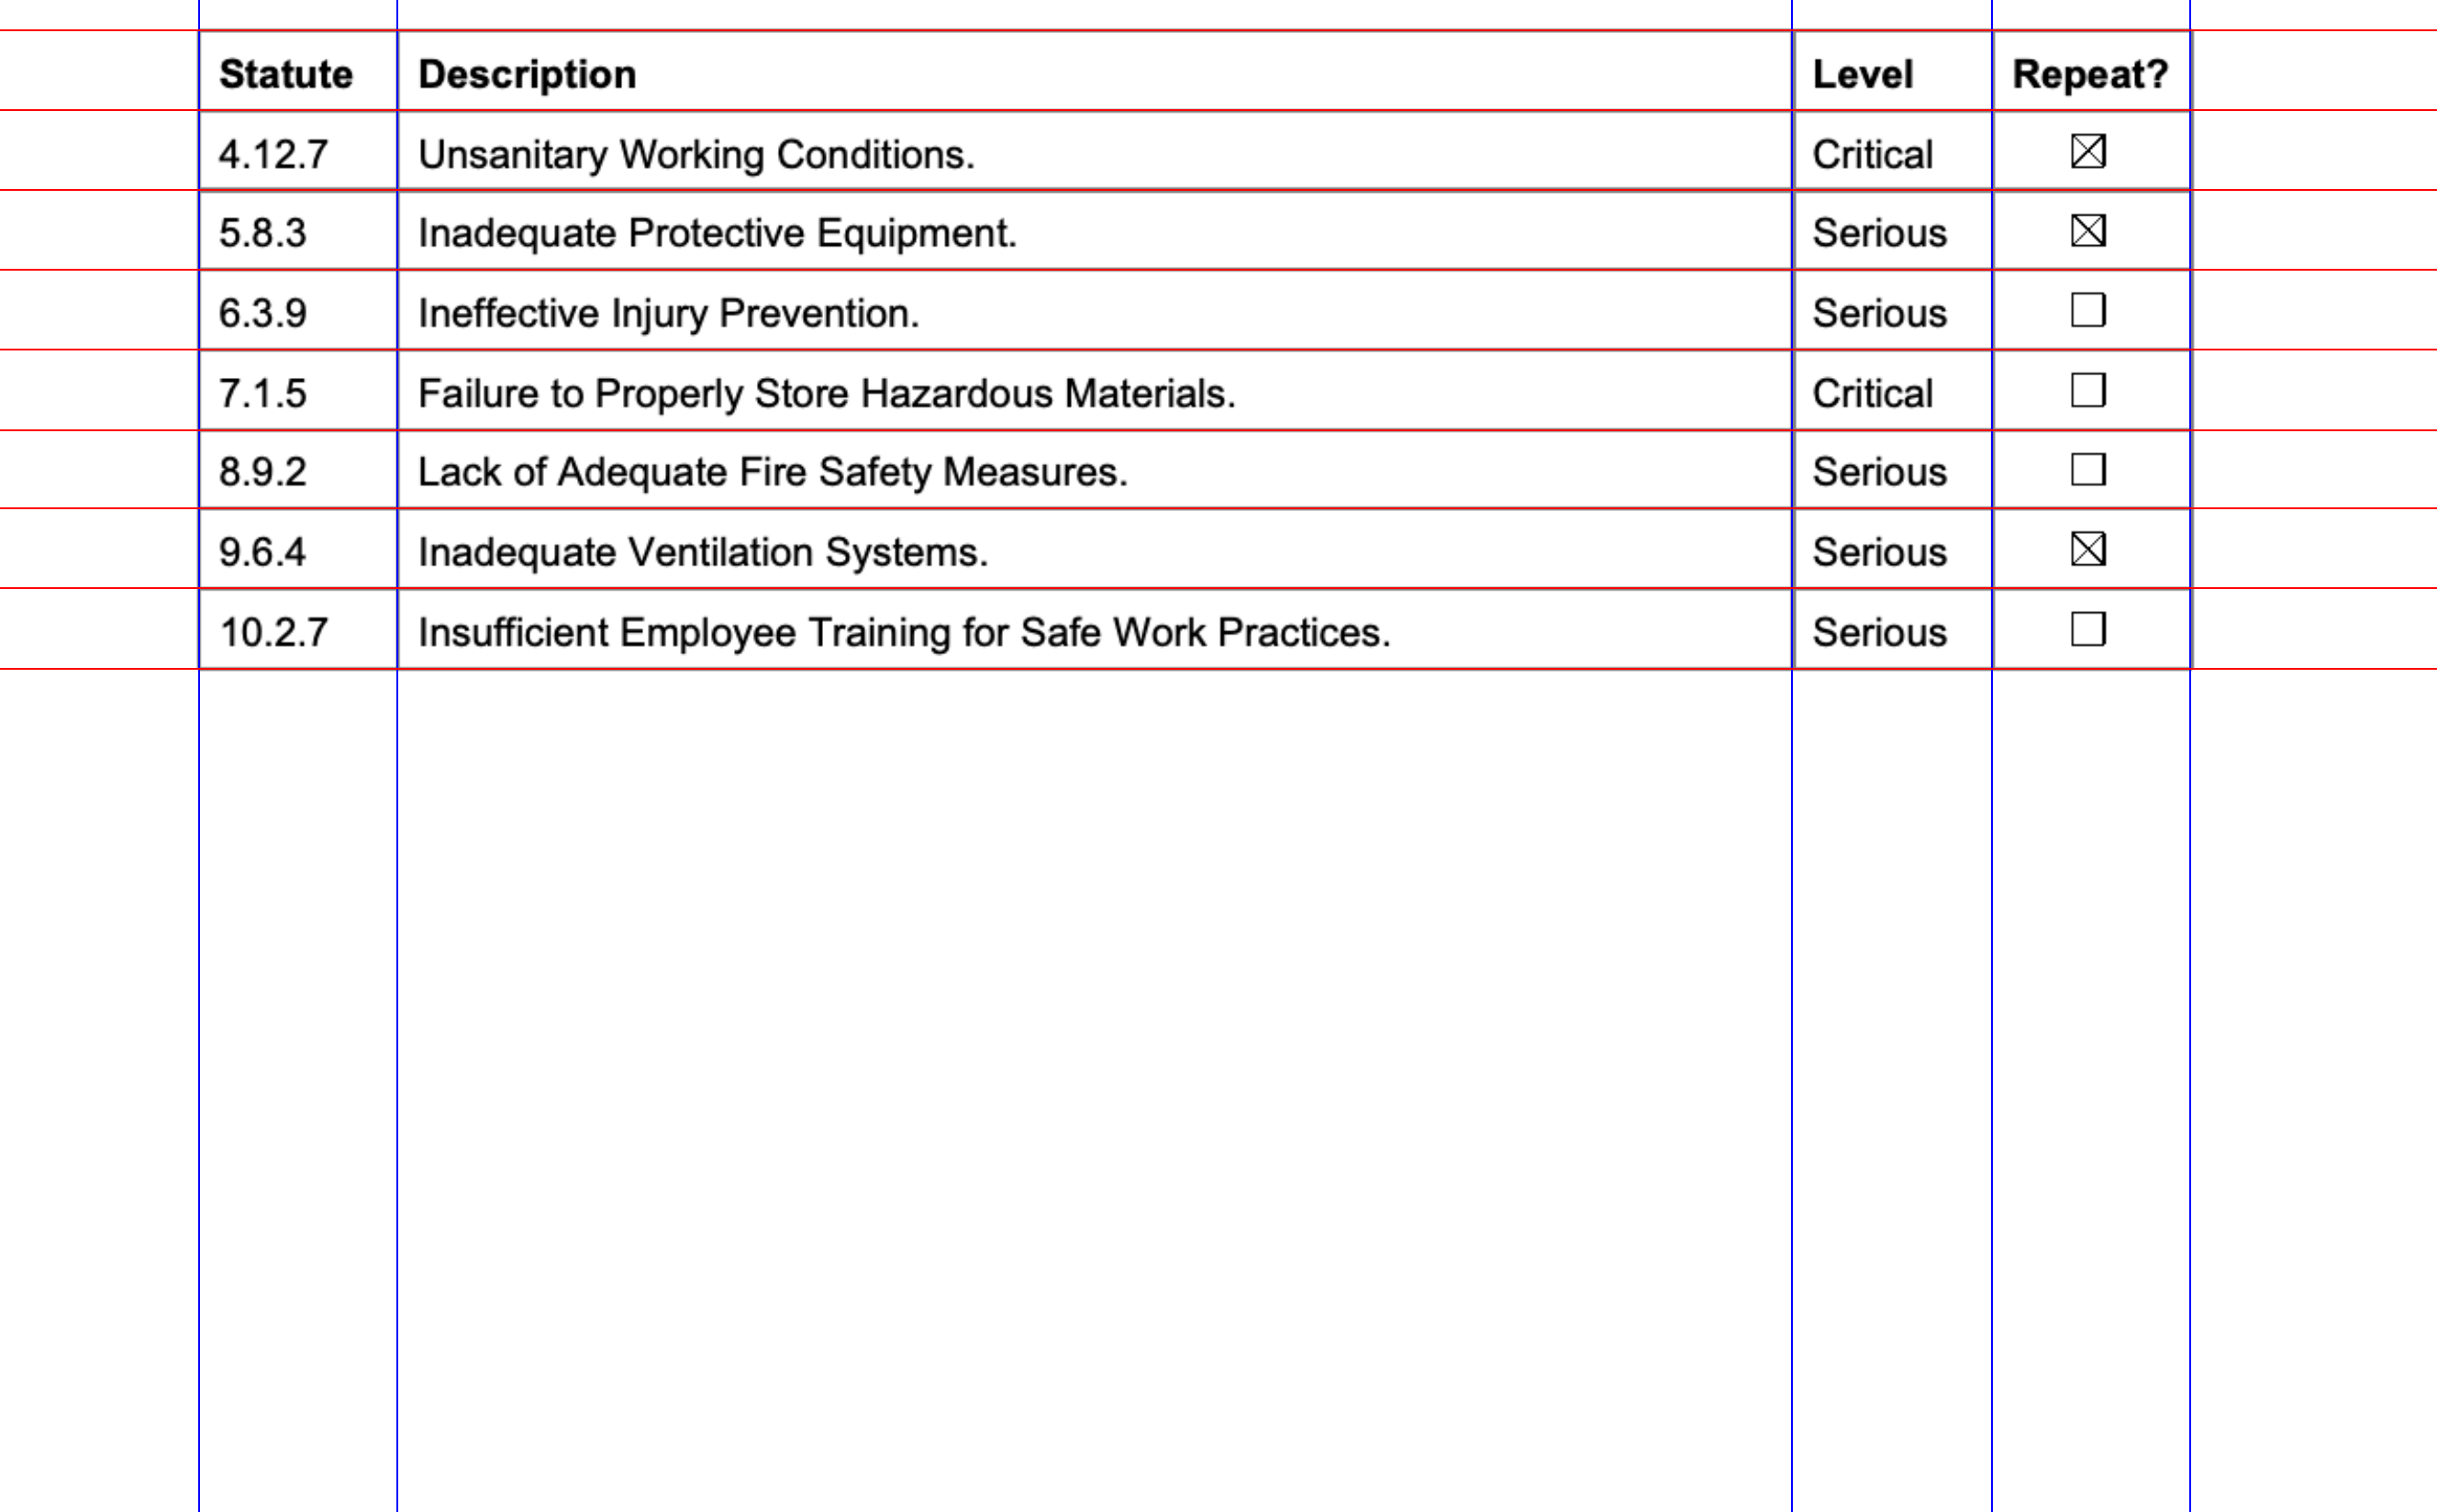

In [8]:
from natural_pdf.analyzers.guides import Guides

guides = Guides(table_area)
guides.vertical.from_lines(threshold=0.4)
guides.horizontal.from_lines()
guides.show()

Now we can add the lines and use them to detect the table.

In [9]:
df = guides.extract_table().to_df()
df.head()

Statute                                     Description     Level Repeat?
0  4.12.7                  Unsanitary Working Conditions.  Critical    None
1    None                Inadequate Protective Equipment:   Serious    None
2   6.3.9                  Ineffective Injury Prevention:   Serious    None
3   7.1.5  Failure to Properly Store Hazardous Materials.  Critical    None
4   8.9.2          Lack of Adequate Fire Safety Measures.   Serious    None

### Figuring out information about things that are *not* text

In a tiny preview of the next notebook: **what about those checkboxes?** Turns out we can use **image classification AI** to do it for us in the next notebook!